In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix

In [2]:
#Download data from https://www.ssa.gov/oact/babynames/limits.html

In [3]:
#create male and female datasets for the year 1900
names=pd.read_csv("yob1900.txt", names=["name", "gender", "1900"])
female=names.where(names["gender"]=="F").dropna()
male=names.where(names["gender"]=="M").dropna().reset_index(drop=True)

# Calculating number living

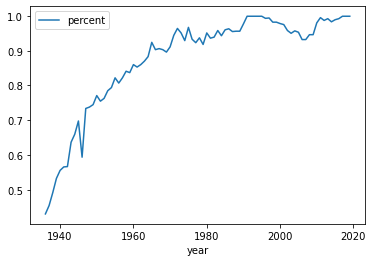

In [4]:
#this data was produced and published by 24/7 Wall St using data from the US Census Bureau and the CDC
alive = pd.DataFrame([[1936, .431], [1937, .455], [1938, .492], [1939,.533], [1940,.556], [1941,.566],[1942,.567], [1943,.637], [1944,.660], [1945,.698], [1946,.594], [1947, .734], [1948,.738],[1949,.745],[1950,.771],[1951,.755],[1952,.763],[1953,.785],[1954,.794],[1955,.822],[1956,.807],[1957,.822],[1958,.841],[1959,.837],[1960,.860],[1961,.853],[1962,.860],[1963,.870],[1964,.883],[1965,.924],[1966,.903],[1967,.906],[1968,.903],[1969,.896],[1970,.911],[1971,.944],[1972,.964],[1973,.951],[1974,.929],[1975,.967],[1976,.933],[1977,.923],[1978,.937],[1979,.918],[1980,.951],[1981,.936],[1982,.939],[1983,.958],[1984,.943],[1985,.960],[1986,.963],[1987,.955],[1988,.956],[1989,.956],[1990,.977],[1991,.999],[1992,.999],[1993,.999],[1994,.999],[1995,.999],[1996,.993],[1997,.994],[1998,.982],[1999,.982],[2000,.978],[2001,.975],[2002,.958],[2003,.950],[2004,.957],[2005,.953],[2006,.932],[2007,.932],[2008,.946],[2009,.946],[2010,.980],[2011,.995],[2012,.987],[2013,.992],[2014,.983],[2015,.989],[2016,.992],[2017,.999],[2018,.999],[2019,.999]], columns = ['year', 'percent']) 
alive.plot(kind="line",x="year",y="percent")

In [5]:
#generate list of years not included in dataset
previous_years = pd.DataFrame([range(1900,1936)]).transpose()

In [6]:
#split train and test data
X=pd.DataFrame(alive["year"])
y=alive["percent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
#perform linear regression with third order polynomial basis function
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_reg=poly_model.fit(X,y)
score=poly_reg.score(X, y)
print("R squared score: ", score)

R squared score:  0.9774600988554695


In [8]:
#fit and print accuracy scores for train/test data
poly_reg=poly_model.fit(X_train,y_train)
score_train=poly_reg.score(X_train, y_train)
score_test=poly_reg.score(X_test, y_test)
print("Train R squared score: {:.5f}".format(score_train))
print("Test R squared score: {:.5f}".format(score_test))

Train R squared score: 0.97698
Test R squared score: 0.97879


Text(0, 0.5, 'Actual Frequency')

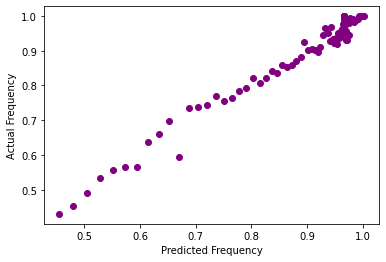

In [9]:
#predict y values and produce graph of predicted vs actual data
y_pred = poly_reg.predict(X)
plt.scatter(y_pred, y, c="purple")
plt.xlabel("Predicted Frequency")
plt.ylabel("Actual Frequency")

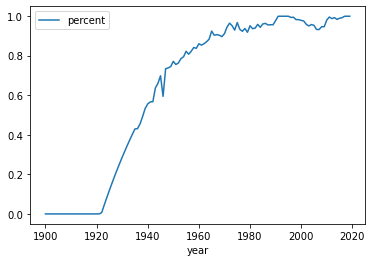

In [10]:
#extrapolate past data
previous_alive_pred = poly_reg.predict(previous_years)
previous_alive_pred = pd.DataFrame([previous_alive_pred]).transpose()
previous_alive=pd.merge(previous_years, previous_alive_pred,left_index=True, right_index=True).rename(columns={"0_x": "year", "0_y": "percent"})
full_alive=previous_alive.append(alive)
full_alive[full_alive < 0] = 0.000001
full_alive.plot(kind="line",x="year",y="percent")
full_alive=full_alive.set_index(["year"])

In [11]:
#create new dataset that reflects living population in 1900
percent_alive=full_alive.at[1900,"percent"]
female_alive=female.copy()
female_alive["1900"]=female_alive["1900"]*percent_alive
male_alive=male.copy()
male_alive["1900"]=male_alive["1900"]*percent_alive

In [12]:
#expand datasets to cover year 1900-2019
for year in range(1901,2020):
    temp=pd.read_csv("yob"+str(year)+".txt", names=["name", "gender", str(year)])
    percent_alive=full_alive.at[year,"percent"]
    temp_female=temp.where(temp["gender"]=="F").dropna()
    temp_female_alive=temp_female.copy()
    temp_female_alive[str(year)]=temp_female_alive[str(year)]*percent_alive
    female=pd.merge(female, temp_female, how="outer")
    female_alive=pd.merge(female_alive, temp_female_alive, how="outer")
    #repeat for male
    temp_male=temp.where(temp["gender"]=="M").dropna().reset_index(drop=True)
    temp_male_alive=temp_male.copy()
    temp_male_alive[str(year)]=temp_male_alive[str(year)]*percent_alive
    male=pd.merge(male, temp_male, how="outer")
    male_alive=pd.merge(male_alive, temp_male_alive, how="outer")

In [13]:
female_alive

,name,gender,1900,1901,1902,1903,1904,1905,1906,1907,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Mary,F,0.016706,0.013136,0.014486,0.014275,0.014961,0.016067,0.016370,0.017580,...,2813.58,2692.470,2542.512,2629.792,2587.256,2602.059,2487.936,2399.598,2324.673,2206.791
1,Helen,F,0.006343,0.005247,0.005967,0.006129,0.006488,0.006811,0.007176,0.007579,...,688.94,726.350,761.964,733.088,788.366,756.585,808.480,759.240,744.255,736.263
2,Anna,F,0.006114,0.004923,0.005288,0.005098,0.005330,0.005424,0.005502,0.005575,...,6202.42,5634.685,5544.966,5336.960,5592.287,5073.570,4745.728,4539.456,4140.855,3803.193
3,Margaret,F,0.005304,0.004424,0.005011,0.005046,0.005302,0.005690,0.006096,0.006713,...,1664.04,1690.505,1753.899,1759.808,1916.850,2081.845,2196.288,2250.747,2309.688,2196.801
4,Ruth,F,0.004765,0.003974,0.004384,0.004518,0.004900,0.005068,0.005140,0.005573,...,911.40,896.495,915.936,979.104,1040.997,1090.867,1088.224,1202.796,1232.766,1333.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68268,Zoeyrose,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.995
68269,Zolana,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.995
68270,Zuhri,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.995
68271,Zuni,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.995


# Graphing

In [14]:
#reformatting tables to plot change in popularity over time
female_graphing=female.fillna(0).set_index(["name"]).drop(columns=["gender"]).transpose().reset_index()
male_graphing=male.fillna(0).set_index(["name"]).drop(columns=["gender"]).transpose().reset_index()

(1920.0, 2020.0, 0.0, 8000.0)

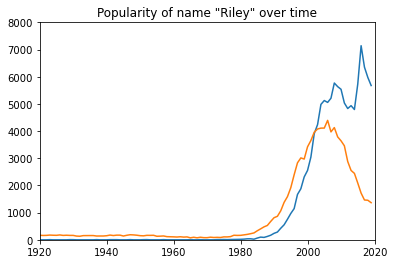

In [15]:
female=plt.plot(range(1900,2020), female_graphing["Riley"])
male=plt.plot(range(1900,2020), male_graphing["Riley"])
plt.title('Popularity of name "Riley" over time')
plt.axis([1920,2020,0,8000])

(1920.0, 2020.0, 0.0, 60000.0)

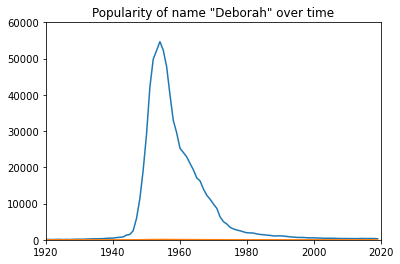

In [16]:
female=plt.plot(range(1900,2020), female_graphing["Deborah"])
male=plt.plot(range(1900,2020), male_graphing["Deborah"])
plt.title('Popularity of name "Deborah" over time')
plt.axis([1920,2020,0,60000])

(1920.0, 2020.0, 0.0, 100000.0)

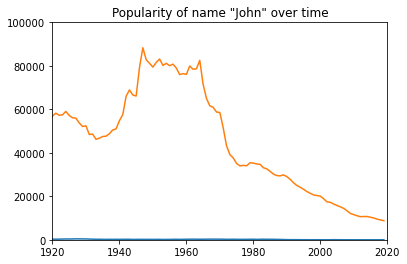

In [17]:
female=plt.plot(range(1900,2020), female_graphing["John"])
male=plt.plot(range(1900,2020), male_graphing["John"])
plt.title('Popularity of name "John" over time')
plt.axis([1920,2020,0,100000])

(1920.0, 2020.0, 0.0, 4500.0)

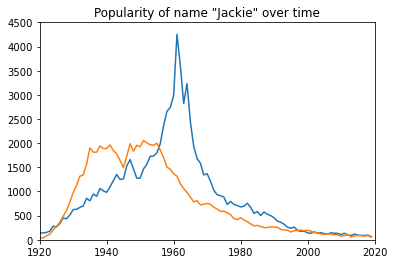

In [18]:
female=plt.plot(range(1900,2020), female_graphing["Jackie"])
male=plt.plot(range(1900,2020), male_graphing["Jackie"])
plt.title('Popularity of name "Jackie" over time')
plt.axis([1920,2020,0,4500])

# Classifying by decade

In [19]:
#combining male and female living population datasets
combined_alive=pd.merge(female_alive, male_alive, how="outer", on="name")
combined_alive=combined_alive.set_index(["name"]).fillna(0)
combined_alive

,gender_x,1900_x,1901_x,1902_x,1903_x,1904_x,1905_x,1906_x,1907_x,1908_x,...,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y
name,,,,,,,,,,,,,,,,,,,,,
Mary,F,0.016706,0.013136,0.014486,0.014275,0.014961,0.016067,0.016370,0.017580,0.018665,...,4.9,0.000,5.922,0.000,4.915,0.000,0.000,0.000,0.000,0.000
Helen,F,0.006343,0.005247,0.005967,0.006129,0.006488,0.006811,0.007176,0.007579,0.008439,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Anna,F,0.006114,0.004923,0.005288,0.005098,0.005330,0.005424,0.005502,0.005575,0.005860,...,9.8,6.965,4.935,6.944,0.000,6.923,5.952,7.992,4.995,0.000
Margaret,F,0.005304,0.004424,0.005011,0.005046,0.005302,0.005690,0.006096,0.006713,0.006976,...,0.0,0.000,5.922,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Ruth,F,0.004765,0.003974,0.004384,0.004518,0.004900,0.005068,0.005140,0.005573,0.006180,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zio,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.995
Zire,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.995
Zoser,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.995


In [20]:
#combining dataset by gender to show popularity per year
combined_alive_year=pd.DataFrame(combined_alive["gender_x"])
combined_alive_year=combined_alive_year.drop("gender_x", axis=1)
for year in range(1900,2020):
    combined_alive_year[str(year)]=combined_alive[str(year)+"_x"]+combined_alive[str(year)+"_y"]

In [21]:
#combining dataset by years to show popularity per decade
combined_alive_decade=pd.DataFrame(combined_alive_year["1900"])
combined_alive_decade=combined_alive_decade.drop("1900", axis=1)
for year in range(1900,2020,10):
    combined_alive_decade[str(year)]=combined_alive_year[str(year)]
    for i in range(1,10):
        combined_alive_decade[str(year)]=combined_alive_decade[str(year)]+combined_alive_year[str(year+i)]

combined_alive_decade=combined_alive_decade.reset_index()
combined_alive_decade["names"]=combined_alive_decade["name"]
combined_alive_decade=combined_alive_decade.reset_index()
combined_alive_decade=combined_alive_decade.set_index(["name"])
combined_alive_decade

,index,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,names
name,,,,,,,,,,,,,,
Mary,0,0.162188,0.480012,73270.734023,232419.752369,419316.564,500499.242,313953.055,118951.175,91746.735,75284.774,44153.399,25302.404,Mary
Helen,1,0.069676,0.248718,27119.016599,55239.387027,58650.355,45932.266,25722.067,10811.391,8032.417,8357.558,8429.806,7503.531,Helen
Anna,2,0.055099,0.119311,12000.745927,26212.428065,26759.167,33549.624,36275.103,35538.974,54820.410,78040.463,86199.847,50668.626,Anna
Margaret,3,0.058139,0.189706,23638.864476,63574.425741,113538.757,119256.143,72358.261,30053.023,29046.775,31113.895,22832.198,19826.393,Margaret
Ruth,4,0.051178,0.174125,20716.876596,43358.284107,55526.776,49908.313,30206.738,12662.094,10757.487,8669.834,8711.410,10692.250,Ruth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zio,99362,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.995,Zio
Zire,99363,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.995,Zire
Zoser,99364,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.995,Zoser


In [22]:
#creates array of names
names=combined_alive_decade["index"]
names

name
Mary            0
Helen           1
Anna            2
Margaret        3
Ruth            4
            ...  
Zio         99362
Zire        99363
Zoser       99364
Zurain      99365
Zyn         99366
Name: index, Length: 99367, dtype: int64

In [23]:
#creates a representative sample of names and decades of birth 
decade_sample=pd.DataFrame()
for year in range(1900,2020,10):
    temp_weight=combined_alive_decade[str(year)]
    temp_sample=pd.DataFrame(names.sample(n=int(1000000*full_alive.at[year,"percent"]), weights=temp_weight, replace=True))
    temp_sample["decade"]=str(year)
    decade_sample=decade_sample.append(temp_sample)

In [24]:
decade_sample

,index,decade
name,,
Lillian,9,1900
Sadie,83,1910
Gregoria,1359,1920
James,525,1930
Barbara,161,1930
...,...,...
Brody,43119,2010
Martin,2448,2010
Owen,6160,2010


In [25]:
#split train and test data 
X1=pd.DataFrame(decade_sample["index"])
y1=decade_sample["decade"]
X1_train_temp, X1_test, y1_train_temp, y1_test = train_test_split(X1, y1, test_size=0.25)

In [26]:
#prevent zero-frequency problem 
X1_train=X1_train_temp.append(pd.DataFrame(names))
X1_train

,index
name,
Matthew,4203
Daniel,1608
Alice,13
Jaxson,57138
Yasmin,14585
...,...
Zio,99362
Zire,99363
Zoser,99364


In [27]:
#prevent zero-frequency problem
temp_append=pd.DataFrame(names)
temp_append["decade"]="0"
y1_train=y1_train_temp.append(temp_append["decade"])
y1_train

name
Matthew    1990
Daniel     1940
Alice      1990
Jaxson     2010
Yasmin     1980
           ... 
Zio           0
Zire          0
Zoser         0
Zurain        0
Zyn           0
Name: decade, Length: 5551876, dtype: object

In [28]:
cnb = CategoricalNB()

In [29]:
decade_class=cnb.fit(X1_train, y1_train)

In [30]:
#predict decade of birth for test data
y1_pred = decade_class.predict(X1_test)
print("Number of mislabeled points out of a total %d points : %d" % (X1_test.shape[0], (y1_test != y1_pred).sum()))

Number of mislabeled points out of a total 1817503 points : 1223846


In [32]:
#fit and print accuracy scores for train/test data
score1_train_temp=decade_class.score(X1_train_temp, y1_train_temp)
score1_train=decade_class.score(X1_train, y1_train)
score1_test=decade_class.score(X1_test, y1_test)
print("Temp train score: " + str(score1_train_temp))
print("Train score: " + str(score1_train))
print("Test score: " + str(score1_test))

Temp train score: 0.33730581645990865
Train score: 0.33924370789261143
Test score: 0.3266332985420107


In [33]:
#confusion matrix for decade classification
decade_confusion=pd.DataFrame(confusion_matrix(y1_pred, y1_test,labels=["0", "1900", "1910", "1920", "1930","1940", "1950","1960", "1970","1980", "1990","2000", "2010"]), columns=["0", "1900", "1910", "1920", "1930","1940", "1950","1960", "1970","1980", "1990","2000", "2010"])
decade_confusion

,0,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,0,0,0,0,169,134,149,188,408,469,801,1201,1649
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2395,1887,1173,709,365,214,146,141,147
5,0,0,0,0,23170,33300,25914,16578,8925,5571,3667,2907,3446
6,0,0,0,0,26115,61920,84492,63189,35967,23230,15409,9936,7832
7,0,0,0,0,7849,20151,44948,68494,45299,27783,16294,9314,6149
8,0,0,0,0,1402,5073,13048,30739,58694,39511,20466,11436,6360
9,0,0,0,0,2636,5694,10058,17492,45326,77591,54075,29342,16208


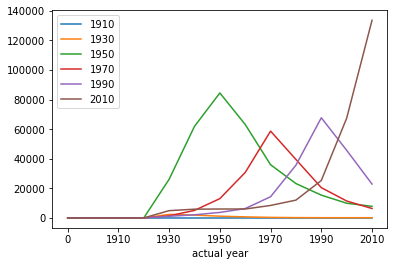

In [34]:
#Number of names from each actual decade for all individuals predicted to have been born in a given decade
decade_confusion_graphing=decade_confusion.transpose().reset_index().rename(columns={"index": "actual year"})
decade_confusion_graphing=decade_confusion_graphing.rename(columns={0:"0", 1:"1900", 2:"1910", 3:"1920", 4:"1930",5:"1940", 6:"1950",7:"1960", 8:"1970",9:"1980", 10:"1990",11:"2000", 12:"2010"})
decade_confusion_graphing
decade_confusion_graphing.plot(kind="line", x="actual year", y=["1910", "1930", "1950", "1970", "1990", "2010"])

# Classifying by gender

In [35]:
combined_alive

,gender_x,1900_x,1901_x,1902_x,1903_x,1904_x,1905_x,1906_x,1907_x,1908_x,...,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y
name,,,,,,,,,,,,,,,,,,,,,
Mary,F,0.016706,0.013136,0.014486,0.014275,0.014961,0.016067,0.016370,0.017580,0.018665,...,4.9,0.000,5.922,0.000,4.915,0.000,0.000,0.000,0.000,0.000
Helen,F,0.006343,0.005247,0.005967,0.006129,0.006488,0.006811,0.007176,0.007579,0.008439,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Anna,F,0.006114,0.004923,0.005288,0.005098,0.005330,0.005424,0.005502,0.005575,0.005860,...,9.8,6.965,4.935,6.944,0.000,6.923,5.952,7.992,4.995,0.000
Margaret,F,0.005304,0.004424,0.005011,0.005046,0.005302,0.005690,0.006096,0.006713,0.006976,...,0.0,0.000,5.922,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Ruth,F,0.004765,0.003974,0.004384,0.004518,0.004900,0.005068,0.005140,0.005573,0.006180,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zio,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.995
Zire,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.995
Zoser,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.995


In [36]:
#combining dataset by years to show popularity per gender
combined_alive_gender=pd.DataFrame(combined_alive["gender_x"])
combined_alive_gender=combined_alive_gender.drop("gender_x", axis=1)
combined_alive_gender["F"]=0
combined_alive_gender["M"]=0
for year in range(1900,2020):
    combined_alive_gender["F"]+=combined_alive[str(year)+"_x"]
    combined_alive_gender["M"]+=combined_alive[str(year)+"_y"]
combined_alive_gender

,F,M
name,,
Mary,1.887969e+06,6929.943870
Helen,2.548860e+05,912.112148
Anna,4.388401e+05,1225.485907
Margaret,5.237221e+05,1516.834333
Ruth,2.502822e+05,928.115584
...,...,...
Zio,0.000000e+00,4.995000
Zire,0.000000e+00,4.995000
Zoser,0.000000e+00,4.995000


In [37]:
#creating representative samples for male and female 
female_weight=combined_alive_gender["F"]
male_weight=combined_alive_gender["M"]
female_sample=pd.DataFrame(names.sample(n=5000000, weights=female_weight, replace=True))
female_sample["gender"]="F"
male_sample=pd.DataFrame(names.sample(n=5000000, weights=male_weight, replace=True))
male_sample["gender"]="M"

In [38]:
#combine into represenetative sample of names and gender 
gender_sample=male_sample.append(female_sample)
gender_sample

,index,gender
name,,
Derek,16419,M
Seth,20394,M
Harry,1637,M
Noah,11208,M
Owen,6160,M
...,...,...
Joseline,22493,F
Doris,116,F
Celica,25809,F


In [39]:
#split train and test data 
X2=pd.DataFrame(gender_sample["index"])
y2=gender_sample["gender"]
X2_train_temp, X2_test, y2_train_temp, y2_test = train_test_split(X2, y2, test_size=0.25)

In [40]:
#perform Laplacian correction 
X2_train=X2_train_temp.append(pd.DataFrame(names)).append(pd.DataFrame(names))
X2_train

,index
name,
Joann,1367
Emily,104
Luis,8472
Aria,1948
William,513
...,...
Zio,99362
Zire,99363
Zoser,99364


In [41]:
#perform laplacian correction 
female_append=pd.DataFrame(names)
female_append["gender"]="F"
male_append=pd.DataFrame(names)
male_append["gender"]="M"
y2_train=y2_train_temp.append(female_append["gender"]).append(male_append["gender"])
y2_train

name
Joann      F
Emily      F
Luis       M
Aria       F
William    M
          ..
Zio        M
Zire       M
Zoser      M
Zurain     M
Zyn        M
Name: gender, Length: 7698734, dtype: object

In [42]:
gender_class=cnb.fit(X2_train, y2_train)

In [43]:
#predict gender for test data
y2_pred = gender_class.predict(X2_test)
print("Number of mislabeled points out of a total %d points : %d" % (X2_test.shape[0], (y2_test != y2_pred).sum()))

Number of mislabeled points out of a total 2500000 points : 54860


In [45]:
#fit and print accuracy scores for train/test data
score2_train_temp=gender_class.score(X2_train_temp, y2_train_temp)
score2_train=gender_class.score(X2_train, y2_train)
score2_test=gender_class.score(X2_test, y2_test)
print("Temp train score: " + str(score2_train_temp))
print("Train score: " + str(score2_train))
print("Test score: " + str(score2_test))

Temp train score: 0.9788504
Train score: 0.9664894254042288
Test score: 0.978056


In [46]:
#confusion matrix for gender
pd.DataFrame(confusion_matrix(y2_pred, y2_test))
#Actual by Predicted
#0=Female, 1=Male

,0,1
0,1222086,27768
1,27092,1223054
